# CS105 Final Project

By: Team 9 - Pranathi Darbhala, Grace Lee, Trinah Maulion, and Megan Miyazaki

## Import & Clean Data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
from langdetect import detect

#read in listings_df
listings_df = pd.read_csv("listings.csv")

#drop columns that we don't need
listings_df.drop(listings_df.loc[:,"scrape_id":"last_scraped"], inplace = True, axis = 1)
listings_df.drop(listings_df.loc[:,"minimum_minimum_nights":"calendar_updated"], inplace = True, axis = 1)
listings_df.drop(listings_df.loc[:,"neighborhood_overview":"picture_url"], inplace = True, axis = 1)
listings_df.drop(listings_df.loc[:,"host_is_superhost":"host_picture_url"], inplace = True, axis = 1)
listings_df.drop(listings_df.loc[:,"host_listings_count":"host_has_profile_pic"], inplace = True, axis = 1)
listings_df.drop(listings_df.loc[:,"availability_30":"availability_365"], inplace = True, axis = 1)
listings_df.drop(labels=["host_url", "host_since", "calendar_last_scraped", "first_review", "last_review", "license", "instant_bookable", "neighbourhood", "bathrooms", "beds" ], axis = 1, inplace = True)

#create an array of listing ids that have more than 30 reviews
row_numbers = listings_df.loc[listings_df['number_of_reviews'] > 30, 'id'].to_numpy()


#drop rows in listings.csv that have more than 30 reviews
listings_df.drop(listings_df.index[listings_df['number_of_reviews'] > 30], inplace=True)
listings_df["price"] = listings_df["price"].str[1:]
listings_df["price"] = listings_df["price"].str.replace(',','')
listings_df["price"] = listings_df["price"].astype(float)

row_numbers = np.append(row_numbers, listings_df.loc[1000:, 'id'])

listings_df = listings_df.iloc[:1000]

print(row_numbers)


#able to see all columns
pd.set_option('display.max_columns', None)
listings_df

[    2708     5728     5729 ... 53684370 53684541 53686384]


id                           listing_url  \
0         109      https://www.airbnb.com/rooms/109   
2        2732     https://www.airbnb.com/rooms/2732   
3        2864     https://www.airbnb.com/rooms/2864   
4        3021     https://www.airbnb.com/rooms/3021   
8        6033     https://www.airbnb.com/rooms/6033   
...       ...                                   ...   
2248  4614406  https://www.airbnb.com/rooms/4614406   
2249  4616105  https://www.airbnb.com/rooms/4616105   
2252  4624167  https://www.airbnb.com/rooms/4624167   
2254  4624592  https://www.airbnb.com/rooms/4624592   
2255  4625389  https://www.airbnb.com/rooms/4625389   

                                                   name  \
0     Amazing bright elegant condo park front *UPGRA...   
2                                 Zen Life at the Beach   
3                * Beautiful Master Suite/Jacuzzi Tub/*   
4       Hollywood Hills Zen Modern style Apt/Guesthouse   
8                              Poolside Serenity Studio   
...                                                 ...   
2248                     Stay in the Heart of Hollywood   
2249                  Hollywood - blocks from Los Feliz   
2252                          Malibu Condo Near Beaches   
2254                     Magic Hollywood Blvd with Pool   
2255                Beautiful Room In Gay Friendly Home   

                                            description   host_id  \
0     *** Unit upgraded with new bamboo flooring, br...       521   
2     An oasis of tranquility awaits you.<br /><br /...      3041   
3     Centrally located.... Furnished with King Size...      3207   
4     A very Modern Hollywood Hills Zen style galler...      3415   
8     Our distinctive bachelor's studio for 1-3 gues...     11619   
...                                                 ...       ...   
2248  Just steps away from the famous Chinese Theatr...  20450485   
2249  10 minutes from Hollywood Walk of Fame, 5 minu...  18519457   
2252  We are on Point Dume in between 3 beautiful be...  23386396   
2254  All you need is close to my appartment, 1 minu...   3575638   
2255  My home is located in the heart of Los Angeles...  23957010   

           host_name                             host_location  \
0              Paolo  San Francisco, California, United States   
2     Yoga Priestess   Santa Monica, California, United States   
3          Bernadine     Bellflower, California, United States   
4            Nataraj    Los Angeles, California, United States   
8              Sarah    MONARCH BAY, California, United States   
...              ...                                       ...   
2248           Marco    Los Angeles, California, United States   
2249          Joelly    Los Angeles, California, United States   
2252          Brenda         Malibu, California, United States   
2254           Sasha    Los Angeles, California, United States   
2255        Jonathon    Los Angeles, California, United States   

                                             host_about  host_response_time  \
0     Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...                 NaN   
2     I have been teaching yoga and meditation for 3...      within an hour   
3     Fair, open, honest and very informative for ne...                 NaN   
4     Music Industry, Record producer, Songwriter, C...                 NaN   
8     My name is Sarah with Spec-Green as a mantra t...  within a few hours   
...                                                 ...                 ...   
2248  I live most of the year in Hollywood Californi...                 NaN   
2249                                                NaN                 NaN   
2252  I am from Vera Cruz, Mexico and moved to Malib...                 NaN   
2254                                    Genetic Analyst                 NaN   
2255                                                NaN                 NaN   

     host_response_rate host_acceptance_rate            host_neighbour

In [2]:
# # delete rows with foreign languages and create a new csv file
# #read in reviews.csv
# reviews_df = pd.read_csv("reviews.csv")

# #drop rows that have listing id in the array
# reviews_df = reviews_df[~reviews_df['listing_id'].isin(row_numbers)]

# reviews_df.comments = reviews_df.comments.str.replace("\r", "")
# reviews_df.comments = reviews_df.comments.str.replace("<br/>", "")

# def detectlanguage(Comment):
#     try:
#         return detect(Comment)
#     except:
#        return "NoLang"

# reviews_df['Language'] = reviews_df['comments'].apply(detectlanguage)
# reviews_df = reviews_df[reviews_df['Language']=='en']

# reviews_df
# reviews_df.to_csv('new_reviews.csv',index=False)

In [3]:
reviews1_df = pd.read_csv("new_reviews.csv")
reviews1_df

listing_id                  id        date  reviewer_id reviewer_name  \
0            109              449036  2011-08-15       927861         Edwin   
1            109            74506539  2016-05-15     22509885          Jenn   
2           2732              300833  2011-06-06       121550        Noemie   
3           2732              445238  2011-08-14       961293       Nicolas   
4           2732              549063  2011-09-19      1131391        Connie   
...          ...                 ...         ...          ...           ...   
4457     1691660           634605084  2020-07-04      4352359         Alexi   
4458     1691660           635563833  2020-07-06    168192915           Amy   
4459     1691660           649916570  2020-08-11    175390696     Alexandra   
4460     1691660           651087155  2020-08-14     31056045          Anna   
4461     1691660  505865983855575801  2021-11-28      6229053      Danielle   

                                               comments Language  
0     The host canceled my reservation the day befor...       en  
1     Me and two friends stayed for four and a half ...       en  
2     As I was coming to Venice beach for a Yoga tea...       en  
3     Louise Diana gave me a very warm welcome ! The...       en  
4     The bed is a pull out loveseat in the ground l...       en  
...                                                 ...      ...  
4457  What a place. Worth every penny, can't recomme...       en  
4458  Amazing place to stay, we never had a reason t...       en  
4459  This property is absolutely beautiful. There a...       en  
4460  Had a great time celebrating my birthday with ...       en  
4461  Truly a magical experience!  I logged about 18...       en  

[4462 rows x 7 columns]

## Exploratory Data Analysis

In [4]:
Airbnb = pd.crosstab(listings_df["neighbourhood_group_cleansed"], listings_df["neighbourhood_cleansed"])
Airbnb

neighbourhood_cleansed        Adams-Normandie  Agua Dulce  Alhambra  Altadena  \
neighbourhood_group_cleansed                                                    
City of Los Angeles                         1           0         0         0   
Other Cities                                0           0         2         0   
Unincorporated Areas                        0           1         0        12   

neighbourhood_cleansed        Arcadia  Arlington Heights  Atwater Village  \
neighbourhood_group_cleansed                                                
City of Los Angeles                 0                 10                2   
Other Cities                        3                  0                0   
Unincorporated Areas                0                  0                0   

neighbourhood_cleansed        Avalon  Azusa  Baldwin Hills/Crenshaw  Bel-Air  \
neighbourhood_group_cleansed                                                   
City of Los Angeles                0      0                       1        3   
Other Cities                       1      2                       0        0   
Unincorporated Areas               0      0                       0        0   

neighbourhood_cleansed        Bellflower  Beverly Crest  Beverly Grove  \
neighbourhood_group_cleansed                                             
City of Los Angeles                    0              7             21   
Other Cities                           1              0              0   
Unincorporated Areas                   0              0              0   

neighbourhood_cleansed        Beverly Hills  Boyle Heights  Brentwood  \
neighbourhood_group_cleansed                                            
City of Los Angeles                       0              2          6   
Other Cities                             17              0          0   
Unincorporated Areas                      0              0          0   

neighbourhood_cleansed        Burbank  Calabasas  Canoga Park  Carson  \
neighbourhood_group_cleansed                                            
City of Los Angeles                 0          0            1       0   
Other Cities                        9          2            0       2   
Unincorporated Areas                0          0            0       0   

neighbourhood_cleansed        Carthay  Castaic Canyons  Century City  \
neighbourhood_group_cleansed                                           
City of Los Angeles                 5                0             2   
Other Cities                        0                0             0   
Unincorporated Areas                0                1             0   

neighbourhood_cleansed        Cerritos  Chatsworth  Cheviot Hills  Compton  \
neighbourhood_group_cleansed                                                 
City of Los Angeles                  0           2              1        0   
Other Cities                         1           0              0        1   
Unincorporated Areas                 0           0              0        0   

neighbourhood_cleansed        Culver City  Del Rey  Diamond Bar  Downtown  \
neighbourhood_group_cleansed                                                
City of Los Angeles                     0        9            0        20   
Other Cities                           10        0            2         0   
Unincorporated Areas                    0        0            0         0   

neighbourhood_cleansed        Eagle Rock  East Hollywood  East San Gabriel  \
neighbourhood_group_cleansed                                                 
City of Los Angeles                    3               9                 0   
Other Cities                           0               0                 0   
Unincorporated Areas                   0               0                 1   

neighbourhood_cleansed        Echo Park  El Segundo  Elysian Valley  Encino  \
neighbourhood_group_cleansed                                                  
City of Los Angel

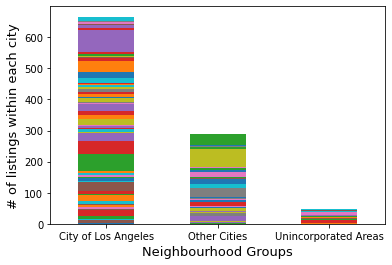

Text(0, 0.5, '# of listings within each city')

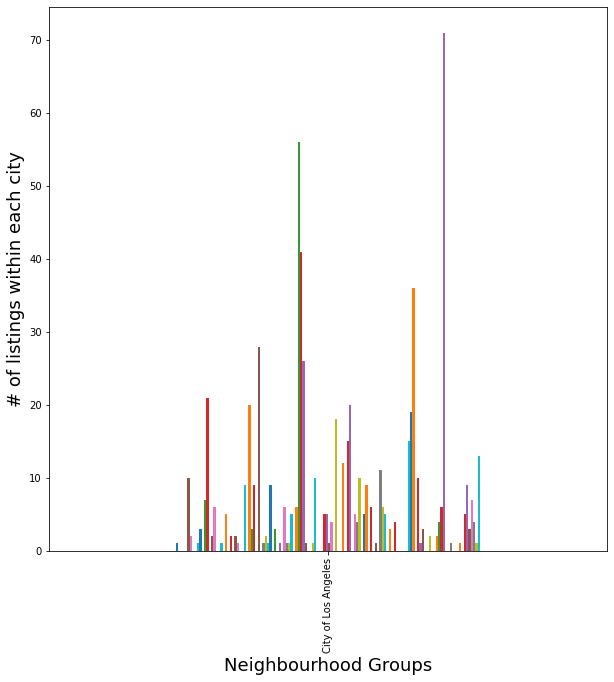

In [5]:
## LATER IF WE HAVE TIME WE CAN SWITCH OUT THESE GRAPHS WITH THE MAP WITH CITY PTS.
Airbnb.plot(kind="bar", stacked=True, rot=0, legend=False)
plt.xlabel("Neighbourhood Groups", fontsize=13)
plt.ylabel("# of listings within each city", fontsize=13)

plt.show()
Airbnb.loc[["City of Los Angeles"]].plot.bar(legend = False, width = 0.6, figsize = (10,10))

plt.xlabel("Neighbourhood Groups", fontsize=18)
plt.ylabel("# of listings within each city", fontsize=18)

# of listings for the 1st 25 cities


neighbourhood_cleansed
Adams-Normandie     1
Agua Dulce          1
Alhambra            2
Altadena           12
Arcadia             3
                   ..
Westlake            3
Westwood            7
Windsor Square      4
Winnetka            1
Woodland Hills     13
Name: id, Length: 130, dtype: int64


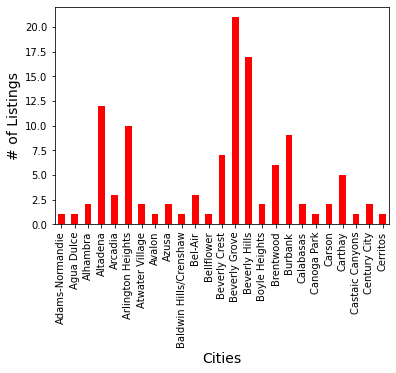



neighbourhood_group_cleansed
City of Los Angeles     666
Other Cities            288
Unincorporated Areas     46
Name: id, dtype: int64




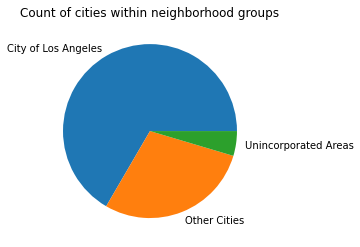

In [6]:
print('\033[1m' + '# of listings for the 1st 25 cities' + '\033[0m')
print ('\n')
      
## Shows the number of listings located in the first 25 cities
Airbnb_locate = listings_df.groupby(['neighbourhood_cleansed'])['id'].count()
print(Airbnb_locate)
Airbnb_locate.head(25).plot.bar(color = 'red')
plt.xlabel("Cities", fontsize=14)
plt.ylabel("# of Listings", fontsize=14)
plt.show()

print("\n")

## Visualizing how many of the listings fall within 3 of the broad groups 
Airbnb_locate = listings_df.groupby(['neighbourhood_group_cleansed'])['id'].count()
print(Airbnb_locate)
# Airbnb_locate.plot.bar()
Airbnb_locate.plot.pie()
plt.ylabel(" ")
plt.title("Count of cities within neighborhood groups")
print("\n")

listing_id
109         2
2732       20
3021       20
6033       24
6931       27
           ..
1678576    14
1687791    14
1688283    19
1689118     5
1691660    28
Name: comments, Length: 335, dtype: int64


Text(0, 0.5, '# of Reviews')

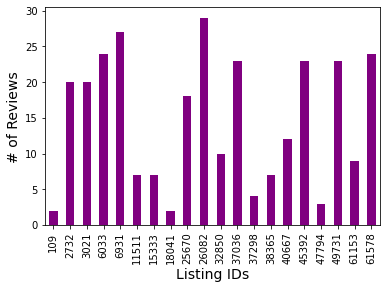

In [7]:
## Shows the number of reviews per listing - only 1st 20 graphed ##
Airbnb_reviews = reviews1_df.groupby(['listing_id'])['comments'].count()
print(Airbnb_reviews)
Airbnb_reviews.describe()
Airbnb_reviews.head(20).plot.bar(color = 'purple')

plt.xlabel("Listing IDs", fontsize=14)
plt.ylabel("# of Reviews", fontsize=14)

In [8]:
loc_df = listings_df.loc[:, "latitude":"longitude"]
# loc_df.head(10)

loc_df = loc_df.reindex(columns=['longitude','latitude'])
loc_df.head(10)

longitude  latitude
0  -118.38607  33.98301
2  -118.48095  34.00440
3  -118.11515  33.87490
4  -118.38223  34.11160
8  -118.64478  34.16887
9  -118.34766  34.09490
15 -118.32234  34.11408
21 -118.41157  34.16497
22 -118.45056  33.99179
34 -118.44166  34.04579

In [9]:
BBox = (loc_df.longitude.min(), loc_df.longitude.max(), loc_df.latitude.min(), loc_df.latitude.max())
BBox

(-118.89083, -117.80062, 33.34329, 34.57221)

In [10]:
la_area = plt.imread('LA_map.png')

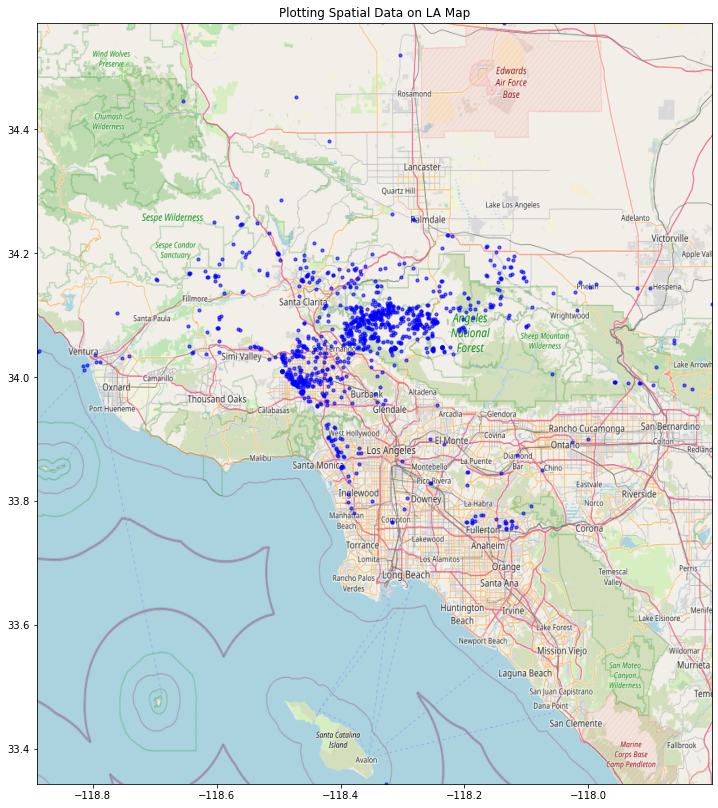

In [11]:
fig, ax = plt.subplots(figsize = (16,14))
ax.scatter(loc_df.longitude, loc_df.latitude, zorder=1, alpha= 0.6, c='b', s=10)

ax.set_title('Plotting Spatial Data on LA Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(la_area, zorder=0, extent = BBox, aspect= 'equal')

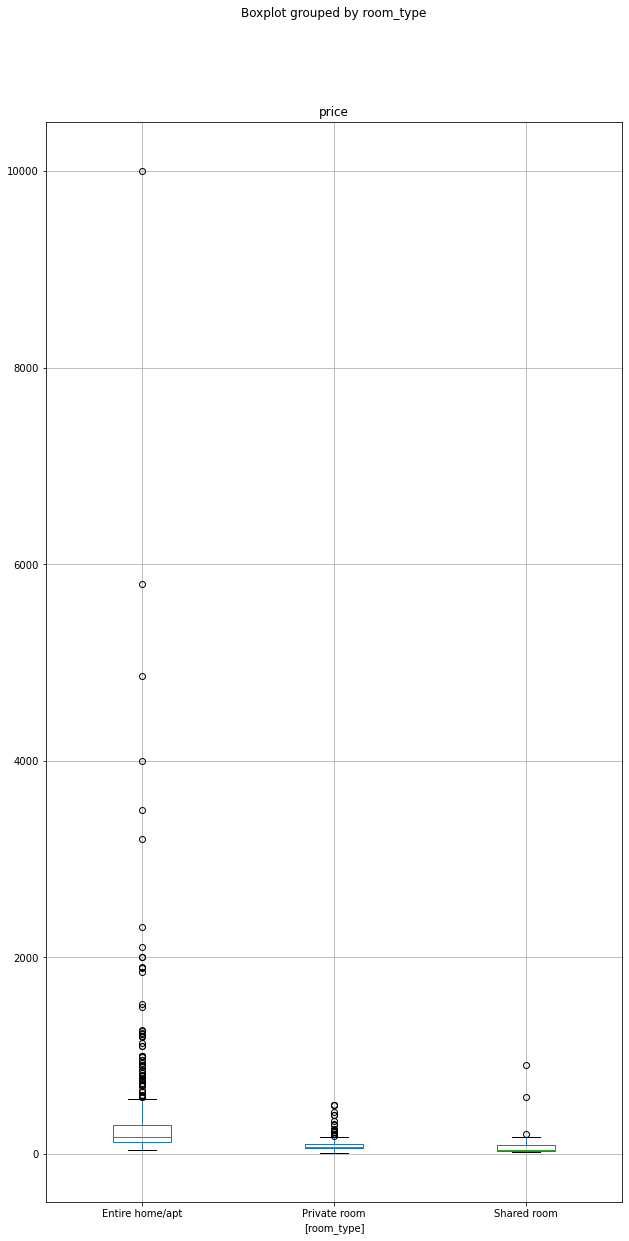

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

temp = pd.DataFrame(listings_df[["price", "room_type"]])
temp.boxplot(by = "room_type", figsize = (10,20))
plt.show()

## TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import re
import string
from nltk.stem import WordNetLemmatizer

#stopword removal and lemmatization
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [14]:
reviews = reviews1_df["comments"]
new_reviews=[]

#text pre processing
for i in range(0, len(reviews)):
    review = re.sub('[^a-zA-Z]', ' ', reviews[i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords)]
    review = ' '.join(review)
    new_reviews.append(review) 

In [15]:
#tf-idf
tf_idf = TfidfVectorizer()

#applying tf idf to training data
reviews_tf = tf_idf.fit_transform(new_reviews)
reviews_tf = tf_idf.transform(new_reviews)

print("n_samples: %d, n_features: %d" % reviews_tf.shape)

n_samples: 4462, n_features: 7540


In [16]:
#tf-idf
tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(reviews_tf)
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=tf_idf.get_feature_names(),columns=["idf_weights"])

#inverse document frequency
df_idf.sort_values(by=['idf_weights'])

idf_weights
great            1.783362
stay             1.858715
place            1.867213
host             2.015249
location         2.127712
...                   ...
intent           8.710429
intense          8.710429
intellectual     8.710429
interned         8.710429
zou              8.710429

[7540 rows x 1 columns]

In [17]:
#tfidf
tf_idf_vector=tfidf_transformer.transform(reviews_tf)
feature_names = tf_idf.get_feature_names()

dense = tf_idf_vector.todense()
denselist = dense.tolist()

#put into data frame
tfidf_df = pd.DataFrame(denselist, columns=feature_names)
tfidf_df.head()

aaaa  aaaand  aaand  aaron  abbot  abbott  abby  ability  able  abnormal  \
0   0.0     0.0    0.0    0.0    0.0     0.0   0.0      0.0   0.0       0.0   
1   0.0     0.0    0.0    0.0    0.0     0.0   0.0      0.0   0.0       0.0   
2   0.0     0.0    0.0    0.0    0.0     0.0   0.0      0.0   0.0       0.0   
3   0.0     0.0    0.0    0.0    0.0     0.0   0.0      0.0   0.0       0.0   
4   0.0     0.0    0.0    0.0    0.0     0.0   0.0      0.0   0.0       0.0   

   abnormalarts  abode  abott  abound  abowl  abroad  absence  absent  \
0           0.0    0.0    0.0     0.0    0.0     0.0      0.0     0.0   
1           0.0    0.0    0.0     0.0    0.0     0.0      0.0     0.0   
2           0.0    0.0    0.0     0.0    0.0     0.0      0.0     0.0   
3           0.0    0.0    0.0     0.0    0.0     0.0      0.0     0.0   
4           0.0    0.0    0.0     0.0    0.0     0.0      0.0     0.0   

   absolut  absolute  absolutely  absolutly  absorb  abundance  abundant   ac  \
0      0.0       0.0         0.0        0.0     0.0        0.0       0.0  0.0   
1      0.0       0.0         0.0        0.0     0.0        0.0       0.0  0.0   
2      0.0       0.0         0.0        0.0     0.0        0.0       0.0  0.0   
3      0.0       0.0         0.0        0.0     0.0        0.0       0.0  0.0   
4      0.0       0.0         0.0        0.0     0.0        0.0       0.0  0.0   

   academy  accept  acceptable  acceptation  accepted  accepting  access  \
0      0.0     0.0         0.0          0.0       0.0        0.0     0.0   
1      0.0     0.0         0.0          0.0       0.0        0.0     0.0   
2      0.0     0.0         0.0          0.0       0.0        0.0     0.0   
3      0.0     0.0         0.0          0.0       0.0        0.0     0.0   
4      0.0     0.0         0.0          0.0       0.0        0.0     0.0   

   accessed  accessibility  accessible  accessing  accessory  acceuil  \
0       0.0            0.0         0.0        0.0        0.0      0.0   
1       0.0            0.0         0.0        0.0        0.0      0.0   
2       0.0            0.0         0.0        0.0        0.0      0.0   
3       0.0            0.0         0.0        0.0        0.0      0.0   
4       0.0            0.0         0.0        0.0        0.0      0.0   

   accident  accidentally  accomadation  accomdated  accomidating  \
0       0.0           0.0           0.0         0.0           0.0   
1       0.0           0.0           0.0         0.0           0.0   
2       0.0           0.0           0.0         0.0           0.0   
3       0.0           0.0           0.0         0.0           0.0   
4       0.0           0.0           0.0         0.0           0.0   

   accommodate  accommodated  accommodates  accommodating  accommodation  \
0          0.0           0.0           0.0            0.0            0.0   
1          0.0           0.0           0.0            0.0            0.0   
2          0.0           0.0           0.0            0.0            0.0   
3          0.0           0.0           0.0            0.0            0.0   
4          0.0           0.0           0.0            0.0            0.0   

   accommodative  accomodated  accomodates  accomodating  accomodation  \
0            0.0          0.0          0.0           0.0           0.0   
1            0.0          0.0          0.0           0.0           0.0   
2            0.0          0.0          0.0           0.0           0.0   
3            0.0          0.0          0.0           0.0           0.0   
4            0.0          0.0          0.0           0.0           0.0   

   accomodations  accompanied  accompany  accomplished  according  \
0            0.0          0.0        0.0           0.0        0.0   
1            0.0          0.0        0.0           0.0        0.0   
2            0.0          0.0        0.0           0.0        0.0   
3            0.0          0.0        0.0           0.0        0.0   
4            0.0          0.0        0.0    

## Cosine Similarity 

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

# cosine similarities between all reviews
sim_df = pd.DataFrame(cosine_similarity(tfidf_df))
sim_df

0         1         2         3         4         5         6     \
0     1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.000000  1.000000  0.012904  0.001478  0.000000  0.009191  0.007481   
2     0.000000  0.012904  1.000000  0.081870  0.000000  0.156996  0.053518   
3     0.000000  0.001478  0.081870  1.000000  0.000000  0.222247  0.273227   
4     0.000000  0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
4457  0.000000  0.001488  0.000466  0.002628  0.000000  0.003622  0.002414   
4458  0.000000  0.002882  0.002896  0.001717  0.000000  0.000638  0.001577   
4459  0.024702  0.013770  0.012758  0.011459  0.003005  0.012132  0.026379   
4460  0.000000  0.001676  0.003813  0.000000  0.043388  0.000000  0.001998   
4461  0.013489  0.010379  0.005510  0.022475  0.028134  0.003551  0.000000   

          7         8         9         10        11        12        13    \
0     0.035444  0.000000  0.000000  0.000000  0.002694  0.003529  0.002726   
1     0.016380  0.032818  0.012641  0.002560  0.030551  0.004267  0.000000   
2     0.029658  0.073262  0.012911  0.017614  0.112965  0.004949  0.070296   
3     0.167770  0.221187  0.035473  0.006921  0.205701  0.054345  0.394122   
4     0.069434  0.023931  0.000000  0.000000  0.000000  0.000000  0.047832   
...        ...       ...       ...       ...       ...       ...       ...   
4457  0.000421  0.000000  0.000000  0.002297  0.000000  0.000000  0.000000   
4458  0.003832  0.000675  0.000000  0.002238  0.057334  0.000000  0.057395   
4459  0.008127  0.006424  0.000341  0.005948  0.031344  0.022875  0.013468   
4460  0.001806  0.000593  0.002040  0.000000  0.000982  0.002108  0.000994   
4461  0.009615  0.011711  0.001004  0.006317  0.037488  0.015322  0.007893   

          14        15        16        17        18        19        20    \
0     0.000000  0.000000  0.000000  0.018963  0.000000  0.010616  0.003166   
1     0.014240  0.026076  0.010027  0.027181  0.015231  0.061326  0.016349   
2     0.122873  0.036594  0.082449  0.059557  0.042206  0.001812  0.003036   
3     0.001637  0.177790  0.165137  0.333794  0.240977  0.003803  0.023331   
4     0.012978  0.024019  0.007566  0.002955  0.025919  0.005596  0.009215   
...        ...       ...       ...       ...       ...       ...       ...   
4457  0.000000  0.000457  0.000000  0.004133  0.000000  0.017774  0.006444   
4458  0.034407  0.016419  0.000000  0.000000  0.000731  0.004960  0.002226   
4459  0.001167  0.052049  0.008926  0.015350  0.016373  0.032758  0.033426   
4460  0.130689  0.011571  0.010060  0.004765  0.003589  0.007088  0.002114   
4461  0.000000  0.016137  0.018047  0.009928  0.004754  0.008619  0.007710   

          21        22        23        24        25        26        27    \
0     0.000000  0.000000  0.006657  0.000000  0.004337  0.000000  0.000000   
1     0.023702  0.020286  0.013483  0.000799  0.016353  0.018840  0.000000   
2     0.020990  0.002809  0.007761  0.000250  0.002459  0.000307  0.000000   
3     0.004356  0.016967  0.000000  0.001411  0.027179  0.001730  0.000000   
4     0.006971  0.011229  0.006251  0.000000  0.000000  0.015391  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
4457  0.000000  0.002845  0.008744  0.001421  0.001565  0.001742  0.000000   
4458  0.000505  0.000983  0.032094  0.000928  0.001022  0.001138  0.000000   
4459  0.005525  0.011175  0.008541  0.000397  0.000801  0.000487  0.000000   
4460  0.003374  0.011505  0.009342  0.000000  0.000881  0.000000  0.000000   
4461  0.023001  0.038303  0.010923  0.001946  0.002143  0.040357  0.066238   

          28        29        30        31        32        33        34    \
0     0.015598  0.000000  0.000000  0.000000  0.003476  0.000000  0.002929   
1     0.003395  0.004533  0.025811  0.006453  0.003052  0.030479  0.007791   
2     0.007217  0.012576  0.

## Polarity

In [19]:
#import textblob
from textblob import TextBlob
    
#function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

#function to analyze the reviews
def analysis(score):
    if score <= 0:
        return 'Negative'
    else:
        return 'Positive'
    
polarity = pd.DataFrame(reviews1_df[["listing_id", "comments"]])
polarity['Polarity'] = polarity['comments'].apply(getPolarity) 
polarity['Analysis'] = polarity['Polarity'].apply(analysis)
polarity['Comment Length'] = polarity['comments'].str.len()

In [20]:
new_polarity = polarity.sort_values(by=["Polarity", 'Comment Length'],ascending=False)
new_polarity.head(10)

listing_id                                           comments  Polarity  \
1649      527222  It was a pleasure being Hamid's guest. He was ...       1.0   
1674      546663  The house was wonderful as was the neighborhoo...       1.0   
1465      440133  Kelly was a great host! She offered suggestion...       1.0   
268        61153  I have been using airbnb for years and this is...       1.0   
1415      424793  Geoff is trustworthy and accommodating. The ar...       1.0   
2857      969436  Great place to stay! Justin is the perfect hos...       1.0   
1599      500559  Stephanie was out of the country during our vi...       1.0   
3778     1305637  Tatiane was awesome..responsive and a great ho...       1.0   
1038      300343  Awesome "hostel style" accommodations with Exc...       1.0   
3518     1223274  Great location! Perfect size for 1-2 people! G...       1.0   

      Analysis  Comment Length  
1649  Positive             221  
1674  Positive             153  
1465  Positive             135  
268   Positive             132  
1415  Positive             118  
2857  Positive              92  
1599  Positive              91  
3778  Positive              84  
1038  Positive              78  
3518  Positive              71

## Top 10 Positive Reviews TF-IDF

In [21]:
top_reviews = new_polarity["comments"].iloc[:10]
top_reviews = top_reviews.reset_index(drop=True)
top=[]

#text pre processing
for j in range(0, len(top_reviews)):
    p_review = re.sub('[^a-zA-Z]', ' ', top_reviews[j])
    p_review = p_review.lower()
    p_review = p_review.split()
    p_review = [lemmatizer.lemmatize(word) for word in p_review if not word in set(stopwords)]
    p_review = ' '.join(p_review)
    top.append(p_review) 

In [22]:
#tf-idf
pos = TfidfVectorizer()

#applying tf idf to training data
top_tf = pos.fit_transform(top)
top_tf = pos.transform(top)

print("n_samples: %d, n_features: %d" % top_tf.shape)

n_samples: 10, n_features: 75


In [23]:
#tf-idf
top_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
top_transformer.fit(top_tf)
topdf_idf = pd.DataFrame(top_transformer.idf_, index=pos.get_feature_names(),columns=["idf_weights"])

#inverse document frequency
topdf_idf.sort_values(by=['idf_weights'])

idf_weights
great        1.451985
host         1.606136
perfect      1.788457
location     2.011601
area         2.011601
...               ...
look         2.704748
made         2.704748
meal         2.704748
hamid        2.704748
year         2.704748

[75 rows x 1 columns]

In [24]:
#tfidf
top_tfidf_vector = top_transformer.transform(top_tf)
names = pos.get_feature_names()

top_dense = top_tfidf_vector.todense()
top_denselist = top_dense.tolist()

#put into data frame
top_tfidf_df = pd.DataFrame(top_denselist, columns=names)
top_tfidf_df

accommodating  accommodation    airbnb    anyday      area   awesome  \
0       0.160559       0.000000  0.160559  0.000000  0.000000  0.000000   
1       0.000000       0.000000  0.000000  0.000000  0.166005  0.000000   
2       0.000000       0.000000  0.000000  0.000000  0.200766  0.000000   
3       0.000000       0.000000  0.277988  0.000000  0.000000  0.000000   
4       0.248191       0.000000  0.000000  0.000000  0.189970  0.000000   
5       0.000000       0.000000  0.000000  0.000000  0.000000  0.000000   
6       0.000000       0.000000  0.000000  0.000000  0.000000  0.000000   
7       0.000000       0.000000  0.000000  0.416158  0.000000  0.300739   
8       0.000000       0.290958  0.000000  0.000000  0.000000  0.290958   
9       0.000000       0.346425  0.000000  0.000000  0.000000  0.000000   

       best  bestbplace    cheer     close   concern   country    eating  \
0  0.160559    0.000000  0.22218  0.000000  0.000000  0.000000  0.000000   
1  0.000000    0.000000  0.00000  0.000000  0.000000  0.000000  0.300118   
2  0.000000    0.000000  0.00000  0.000000  0.362961  0.000000  0.000000   
3  0.277988    0.384676  0.00000  0.000000  0.000000  0.000000  0.000000   
4  0.000000    0.000000  0.00000  0.248191  0.000000  0.000000  0.000000   
5  0.000000    0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
6  0.000000    0.000000  0.00000  0.282965  0.000000  0.391563  0.000000   
7  0.000000    0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
8  0.000000    0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
9  0.000000    0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   

       echo      ever  excellent    family      find    friend    garden  \
0  0.000000  0.160559   0.000000  0.000000  0.160559  0.000000  0.000000   
1  0.000000  0.000000   0.000000  0.300118  0.216882  0.000000  0.300118   
2  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.277988   0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.343443  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
5  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
6  0.000000  0.000000   0.000000  0.000000  0.000000  0.391563  0.000000   
7  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
8  0.000000  0.000000   0.402624  0.000000  0.000000  0.000000  0.000000   
9  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   

      geoff        go     great    guest    hamid  heavenly   helpful  \
0  0.000000  0.000000  0.000000  0.22218  0.66654  0.000000  0.000000   
1  0.000000  0.000000  0.086489  0.00000  0.00000  0.300118  0.000000   
2  0.000000  0.362961  0.209199  0.00000  0.00000  0.000000  0.362961   
3  0.000000  0.000000  0.000000  0.00000  0.00000  0.000000  0.000000   
4  0.343443  0.000000  0.098975  0.00000  0.00000  0.000000  0.000000   
5  0.000000  0.000000  0.120192  0.00000  0.00000  0.000000  0.000000   
6  0.000000  0.000000  0.000000  0.00000  0.00000  0.000000  0.000000   
7  0.000000  0.000000  0.119930  0.00000  0.00000  0.000000  0.000000   
8  0.000000  0.000000  0.000000  0.00000  0.00000  0.000000  0.000000   
9  0.000000  0.000000  0.276299  0.00000  0.00000  0.000000  0.000000   

   hesitate      host    hostel     house    justin    kellie     kelly  \
0   0.22218  0.078346  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.00000  0.000000  0.000000  0.300118  0.000000  0.000000  0.000000   
2   0.00000  0.127988  0.000000  0.000000  0.000000  0.000000  0.362961   
3   0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.00000  0.147067  0.000000  0.000000  0.417066  0.000000  0.000000   
6   0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   0.00000  0.146747  0.000000  0.000000  0.000000  0.000000  0.000000   
8   0.00000  0.141975  0

## Positive Review Ratio


In [25]:
ratio_data = pd.crosstab(new_polarity["listing_id"], new_polarity["Analysis"])
ratio_data["Ratio"] = ratio_data["Positive"]/(ratio_data["Positive"]+ratio_data["Negative"])
ratio_data = ratio_data.sort_values(by=['Ratio', "Positive"], ascending=False)
ratio_data.head(10)

Analysis    Negative  Positive  Ratio
listing_id                           
269521             0        30    1.0
1223274            0        30    1.0
114203             0        29    1.0
895309             0        29    1.0
1110856            0        29    1.0
1175027            0        29    1.0
742791             0        28    1.0
1378519            0        28    1.0
712321             0        27    1.0
96334              0        26    1.0